<h1>CS 178: HW 1</h1>
<h3 style="color:grey;">Ian Schweer</h3>

<b>#0</b> I signed up for piazza.

<b>#1</b>
<ol>
    <li><h6>#A:</h6> <i>4</i> features<br><i>148</i> data points</li></ol>
</ol>

#B feature 1


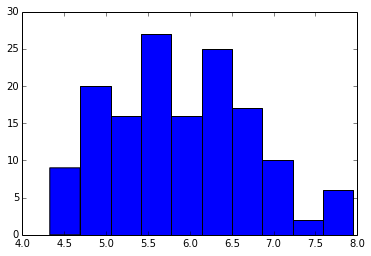

#B feature 2


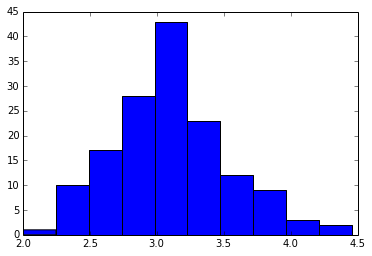

#B feature 3


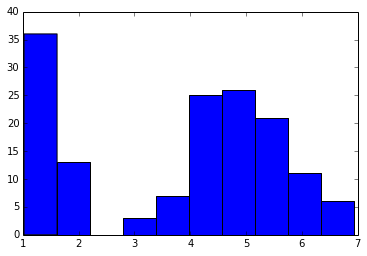

#B feature 4


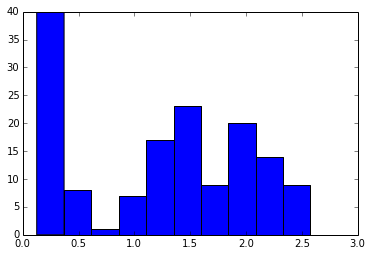

#C all the means:           [5.9001037641891871, 3.0989309168918915, 3.8195548405405413, 1.2525554845945941]
#D all the variances:       [0.69455900490466482, 0.19035056790635788, 3.0767163428400019, 0.57573564154176549]
   all the standard dev:    [0.83340206677489392, 0.43629183800107685, 1.7540571093439352, 0.75877245702632456]
#E Code used: [((x - means[i]) / stds[i]) for x in feature], displaying only a few items
       [-1.1519583433532572, -1.3514319307458624, -1.535833441285325, -0.9871100600610716, -0.58132776903713557]
       [-0.038980598330261733, 0.41785169290207647, 0.091295732898881557, 1.3053720778216868, 2.0521809145233165]
#F feature 1 vs. 2


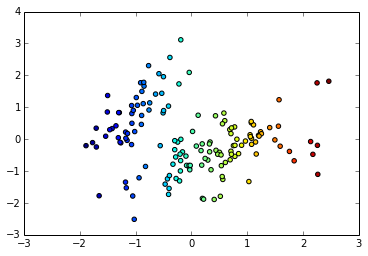

#F feature 1 vs. 3


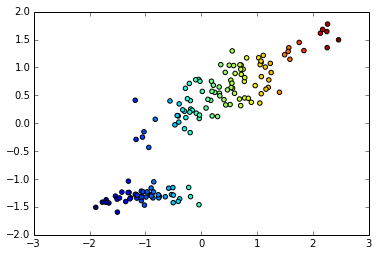

#F feature 1 vs. 4


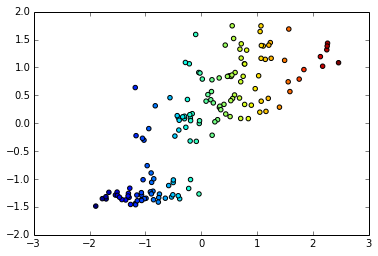

#F feature 2 vs. 3


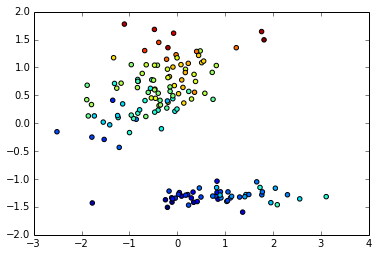

#F feature 2 vs. 4


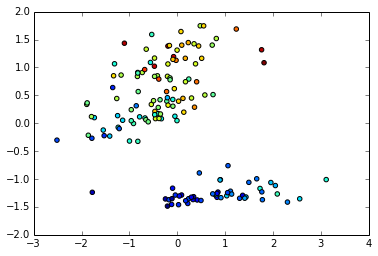

#F feature 3 vs. 4


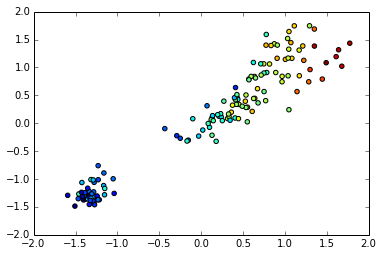

In [28]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
get_ipython().magic("matplotlib inline")
iris = np.genfromtxt("data/iris.txt", delimiter=None)
Y = iris[:, -1]
X = iris[:,0:-1]
feats = X.shape[1]
dps = X.shape[0]
means=[]
stds=[]
var=[]
zscore=[]

for i in range(0, feats):
	feature=X[:,i]
	plt.hist(feature)
	print "#B feature " + str(i + 1)
	plt.show()
	means.append(np.mean(feature))
	var.append(np.var(feature))
	stds.append(np.std(feature))
	zscore.append([((x - means[i]) / stds[i]) for x in feature])

print "#C all the means:           " + str(means)
print "#D all the variances:       " + str(var)
print "   all the standard dev:    " + str(stds)


print "#E Code used: [((x - means[i]) / stds[i]) for x in feature], displaying only a few items"
print "       " + str(zscore[0][0:5])
print "       " + str(zscore[1][0:5])

for i in range(0, feats - 1):
	for j in range(i+1, feats):
		print "#F feature " + str(i + 1) + " vs. " + str(j + 1)        
		plt.scatter(zscore[i], zscore[j], c=zscore[0])
		plt.show()

#A: Plot of K=1


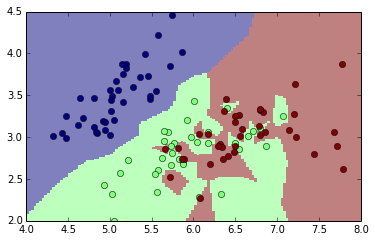

#A: Plot of K=5


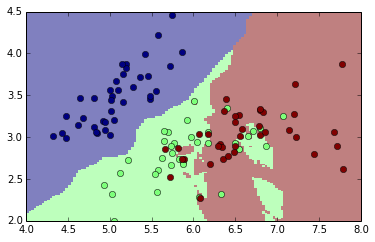

#A: Plot of K=10


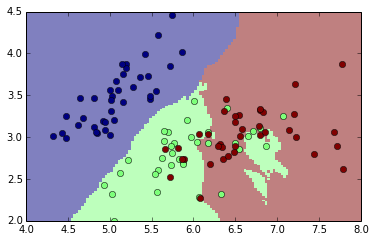

#A: Plot of K=50


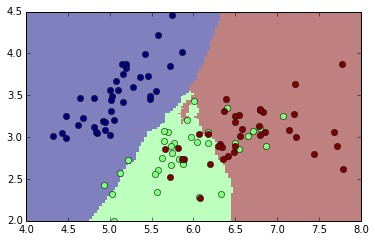

#B: Semilog plot of error


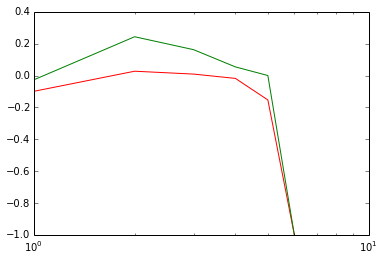

What we see is that the kNN learner really needs a small amount of K to avoid fitness problems.
What you can see from this graph is that the 2nd and 3rd values are in the optimal area of fit.
This would mean training our data with K=2, K=5 would be optimal.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("data/iris.txt", delimiter=None)
Y = iris[:,-1]
X = iris[:,0:2]
X,Y = ml.shuffleData(X,Y)
Xtr,Xte,Ytr,Yte = ml.splitData(X, Y, 0.75)

def partA(Xtr, Xte, Ytr, Yte):
	knn = ml.knn.knnClassify()
	# varying values of K
	for k in [1, 5, 10, 50]:
		knn.train(Xtr, Ytr, K=k)
		ml.plotClassify2D(knn, Xtr, Ytr, axis=plt)
		print "#A: Plot of K=" + str(k) 
		plt.show()

# computing error values of predictions
def partB(Xtr, Xte, Ytr, Yte):
	ks = [1,2,5,10,50,100,200]
	errTrainTr = []
	errTrainTe = []
	for i,k in enumerate(ks):
		learner = ml.knn.knnClassify(Xtr, Ytr, K=k)
		Yhattr = learner.predict(Xtr)
		errTrainTr.append(np.mean(np.transpose(Yhattr) - Ytr))
		Yhatte = learner.predict(Xte)
		errTrainTe.append(np.mean(np.transpose(Yhatte) - Yte))
	plt.semilogx(errTrainTr, color='r')
	plt.semilogx(errTrainTe, color='g')
	print "#B: Semilog plot of error"
	plt.show()
	print "What we see is that the kNN learner really needs a small amount of K to avoid fitness problems."
	print "What you can see from this graph is that the 2nd and 3rd values are in the optimal area of fit."
	print "This would mean training our data with K=2, K=5 would be optimal."
partA(Xtr, Xte, Ytr, Yte)
partB(Xtr, Xte, Ytr, Yte)


<h1>#3</h1><h6>This problem did not require any code for me to complete</h6>
<div><h3>#A:</h3>
    <table>
        <tr>
            <td>P(Y) = 4/10</td> <td>P(X=has_research<b>'</b>|Y) = 1/4</td>
        </tr>
        <tr>
            <td>P(Y<b>'</b>) = 6/10</td>  <td>P(X=has_research|Y<b>'</b>) = 4/6</td>
        </tr>
        <tr>
            <td>P(X=know_author|Y) = 3/4</td> <td>P(X=has_research|Y<b>'</b>) = 4/6</td>
        </tr>
        <tr>        
            <td>P(X=know_author<b>'</b>|Y) = 1/4</td> <td>P(X=has_grade|Y) = 2/4</td>
        </tr>
        <tr>
            <td>P(X=know_author|Y<b>'</b>) = 3/6</td> <td>P(X=has_grade<b>'</b>|Y) = 2/4 </td>
        </tr>
        <tr>         
            <td>P(X=know_author<b>'</b>|Y<b>'</b>) = 3/6 </td> <td>P(X=has_grade|Y<b>'</b>) = 5/6 </td>
        </tr>
        <tr>
            <td>P(X=is_long|Y) = 0/4 </td> <td>P(X=has_grade<b>'</b>|Y<b>'</b>) = 1/6 </td>
        </tr>
        <tr>
            <td>P(X=is_long<b>'</b>|Y) = 4/4 </td> <td>P(X=has_lottery|Y) = 1/4 </td>
        </tr>
        <tr>
            <td>P(X=is_long|Y<b>'</b>) = 5/6 </td> <td>P(X=has_lottery<b>'</b>|Y) = 3/4 </td>
        </tr>
        <tr>
            <td>P(X=is_long<b>'</b>|Y<b>'</b>) = 1/6 </td> <td>P(X=has_lottery|Y<b>'</b>) = 2/6 </td>
        </tr>
        <tr>
            <td>P(X=has_research|Y) = 3/4 </td> <td>P(X=has_lottery<b>'</b>|Y<b>'</b>) = 4/6 </td>
        </tr>
    </table>
</div>
<div>
    <h3>#B:</h3> The predicted class for (0,0,0,0,0) is given by the following term:<br>
    <math> 
        <apply>
        <mi>max <b>(</b></mi>
            <apply>
                <cn>P(Y)</cn>&times;
                <cn>P(Knows Author&prime;|Y)</cn>&times;
                <cn>P(Is Long&prime;|Y)</cn>&times;
                <cn>P(Has Research&prime;|Y)</cn>&times;
                <cn>P(Has Grade&prime;|Y)</cn>&times;
                <cn>P(Has Lottery&prime;|Y)</cn>
            </apply>
            <b>,</b>
            <apply>
                <cn>P(Y&prime;)</cn>&times;
                <cn>P(Knows Author&prime;|Y&prime;)</cn>&times;
                <cn>P(Is Long&prime;|Y&prime;)</cn>&times;
                <cn>P(Has Research&prime;|Y&prime;)</cn>&times;
                <cn>P(Has Grade&prime;|Y&prime;)</cn>&times;
                <cn>P(Has Lottery&prime;|Y&prime;)</cn>
            </apply>
            <b>) = </b>
            <mn>max<b>(</b><mn>0.009</mn><b>,</b><mn>0.0018</mn><b>)</b></mn>
        </apply>
        </math>
        Given the class corresponding too .009 which is <b>+1</b>
        <br>
        The predicted class for (1,1,0,1,0) is given by the following term:<br>
    <math> 
        <apply>
        <mi>max <b>(</b></mi>
            <apply>
                <cn>P(Y)</cn>&times;
                <cn>P(Knows Author|Y)</cn>&times;
                <cn>P(Is Long|Y)</cn>&times;
                <cn>P(Has Research&prime;|Y)</cn>&times;
                <cn>P(Has Grade|Y)</cn>&times;
                <cn>P(Has Lottery&prime;|Y)</cn>
            </apply>
            <b>,</b>
            <apply>
                <cn>P(Y&prime;)</cn>&times;
                <cn>P(Knows Author|Y&prime;)</cn>&times;
                <cn>P(Is Long|Y&prime;)</cn>&times;
                <cn>P(Has Research&prime;|Y&prime;)</cn>&times;
                <cn>P(Has Grade|Y&prime;)</cn>&times;
                <cn>P(Has Lottery&prime;|Y&prime;)</cn>
            </apply>
            <b>) = </b>
            <mn>max<b>(</b><mn>0</mn><b>,</b><mn>0.0462</mn><b>)</b></mn>
        </apply>
        </math>
        Given the class corresponding too 0.0462 which is <b>-1</b>
</div>
<div>
    <h3>#C:</h3> The posterior probability is froms froma simple calculation P(B|A) = (P(A|B) * P(B)) / P(A) resulting in: <i>.01125</i>
</div>
<div>
    <h3>#D:</h3> Joint probability classifiers would consider all events dependent on eachother. Which means, if any email is long, regardless of every circumstance, it will given a class of -1. This is not correct.
</div>